In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

In [3]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [11]:
!pip install six

In [12]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

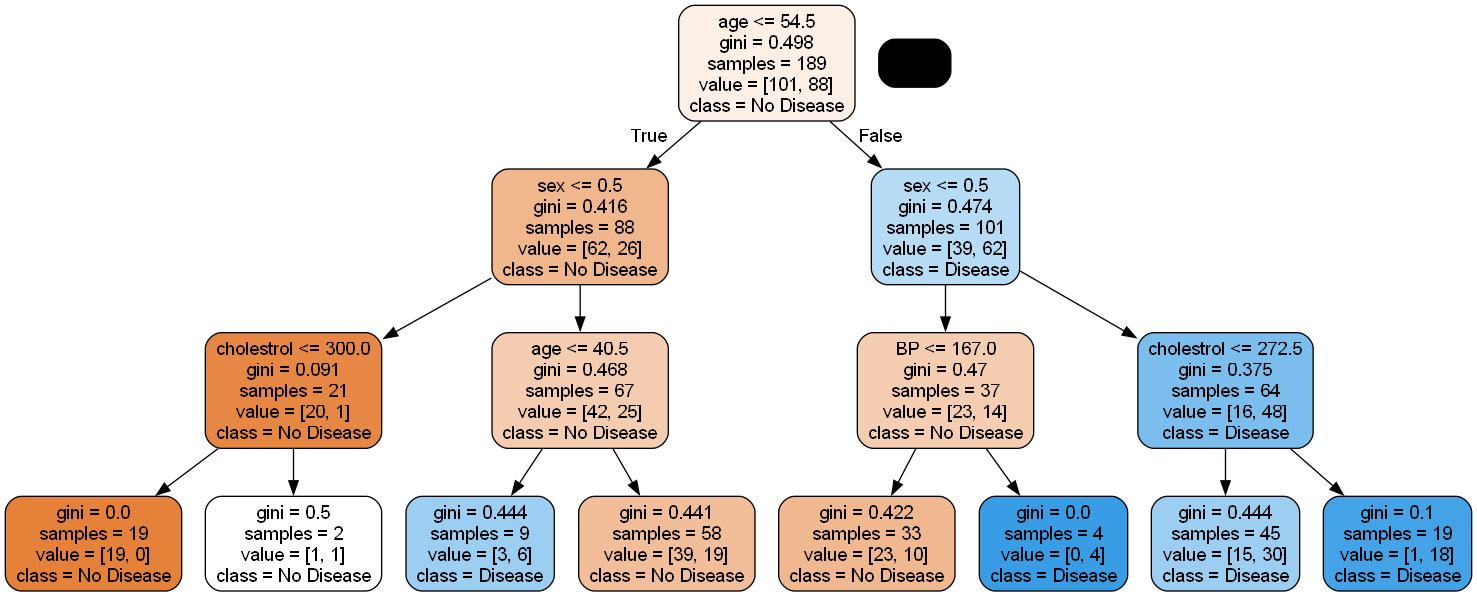

In [13]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

#### Evaluating model performance

In [15]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [17]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [18]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)

### Creating helper functions to evaluate model performance and help plot the decision tree

In [20]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [21]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [22]:
evaluate_model(dt)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


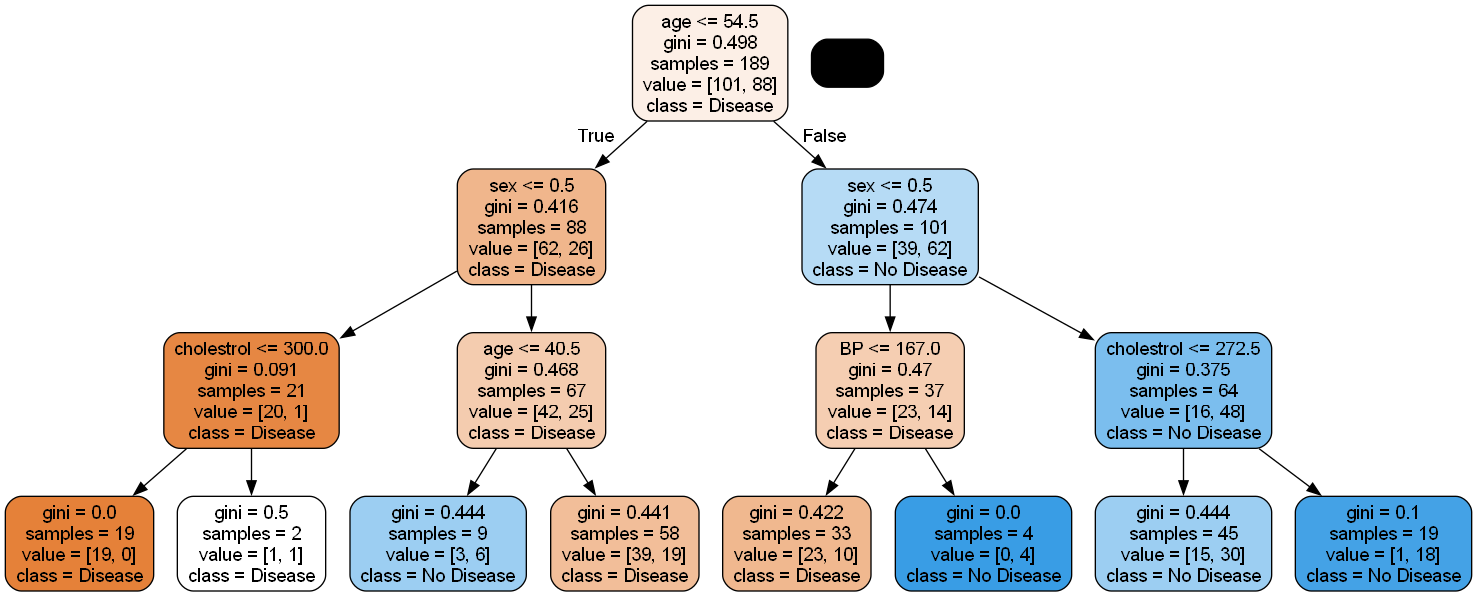

In [23]:
dt_graph = get_dt_graph(dt)
Image(dt_graph.create_png())

### Without setting any hyper-parameters

In [25]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

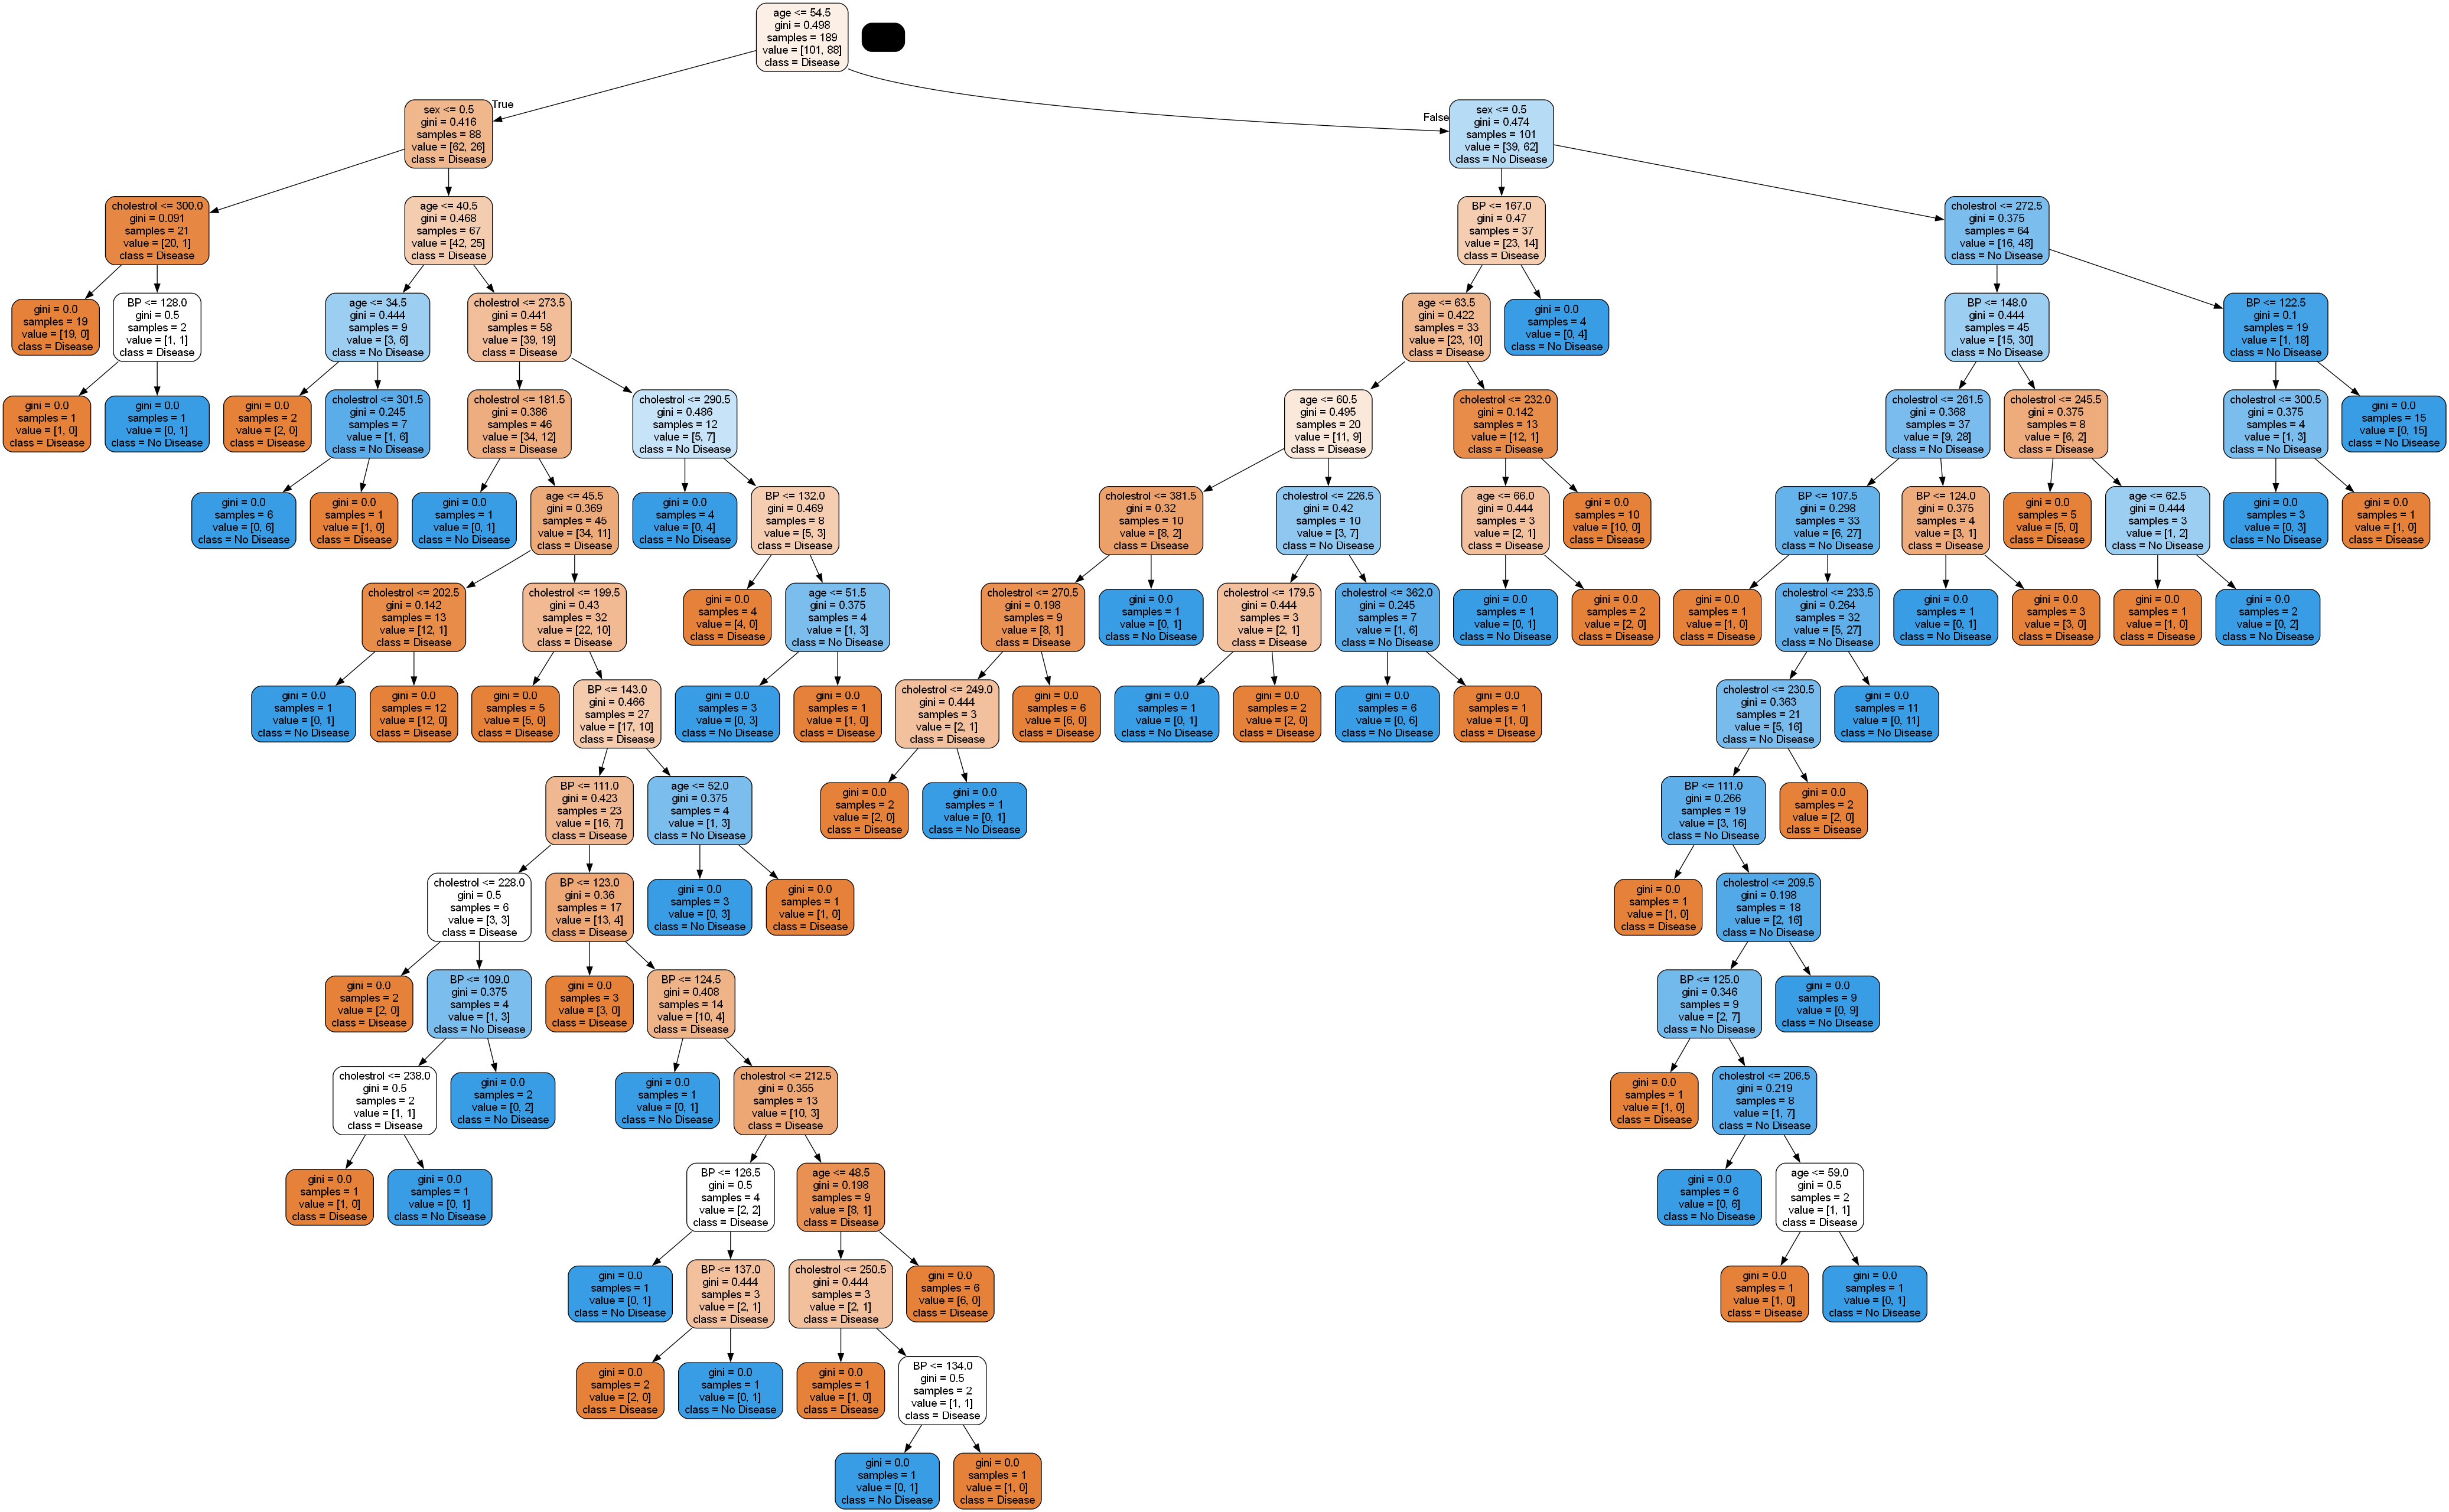

In [26]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [27]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[31 18]
 [12 20]]


### Controlling the depth of the tree

In [29]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [30]:
dt_depth = DecisionTreeClassifier(max_depth=3,random_state=42)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

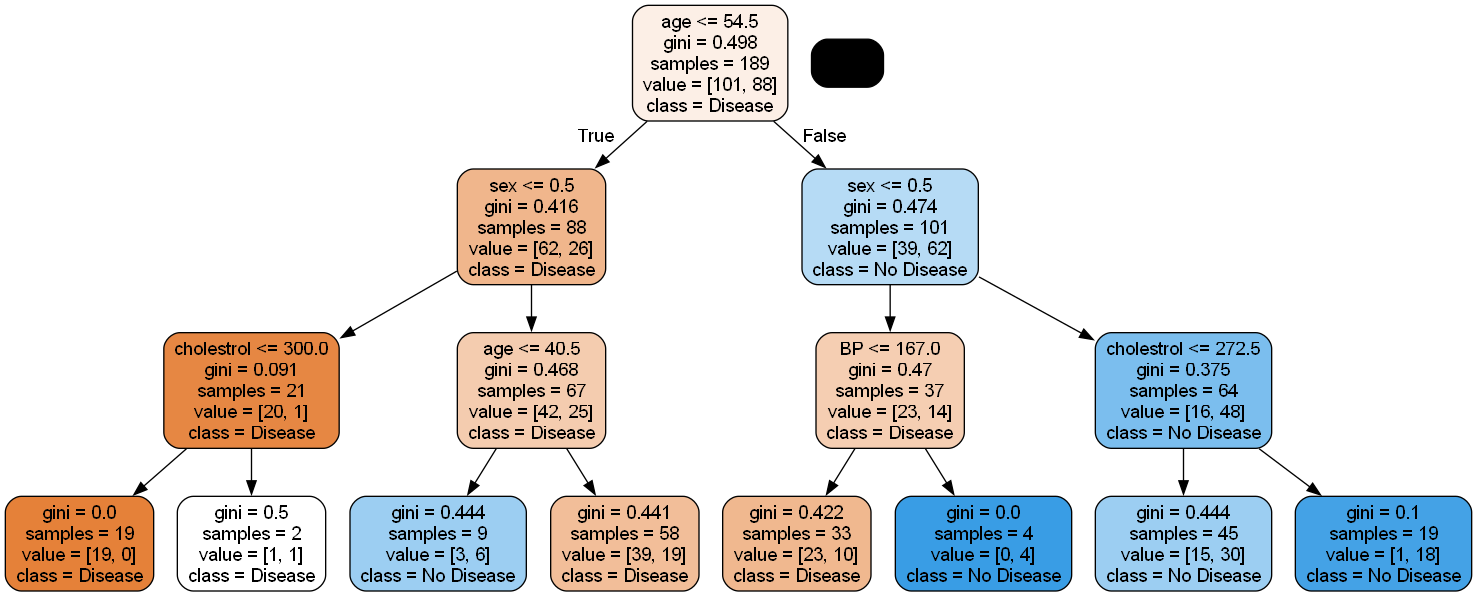

In [31]:
gph = get_dt_graph(dt_depth) 
Image(gph.create_png())

In [32]:
evaluate_model(dt_depth)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


### Specifying minimum samples before split

In [34]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

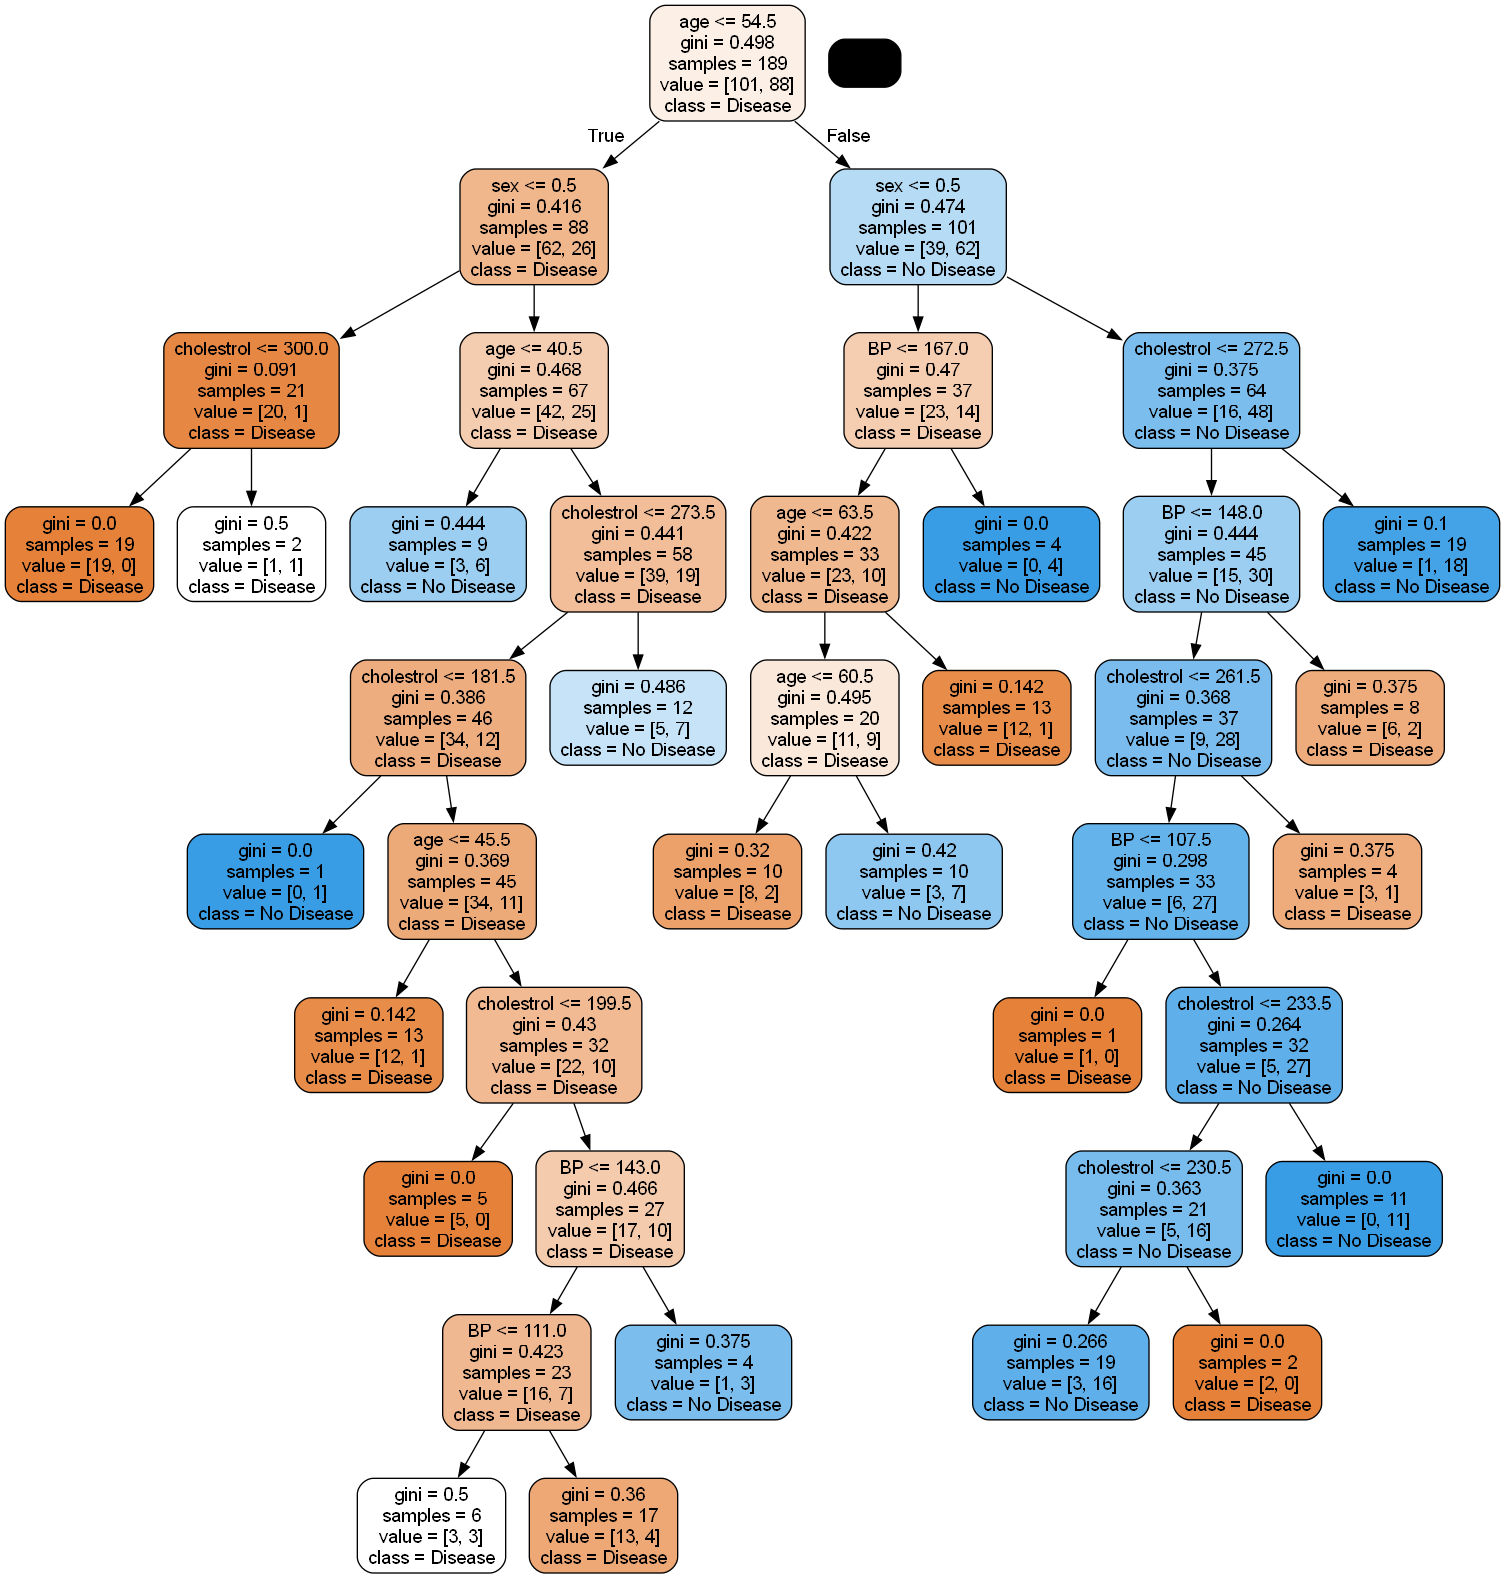

In [35]:
gph = get_dt_graph(dt_min_split) 
Image(gph.create_png())

In [36]:
evaluate_model(dt_min_split)

Train Accuracy : 0.8359788359788359
Train Confusion Matrix:
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[32 17]
 [12 20]]


### Specifying minimum samples in leaf node

In [38]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

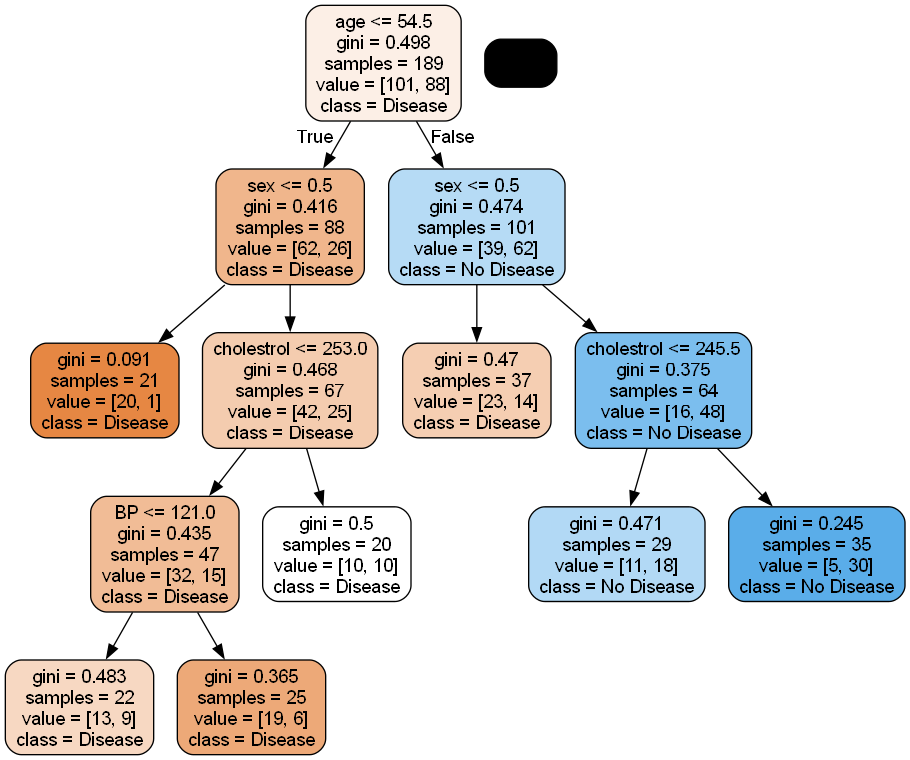

In [39]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [40]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Using Entropy instead of Gini

In [42]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

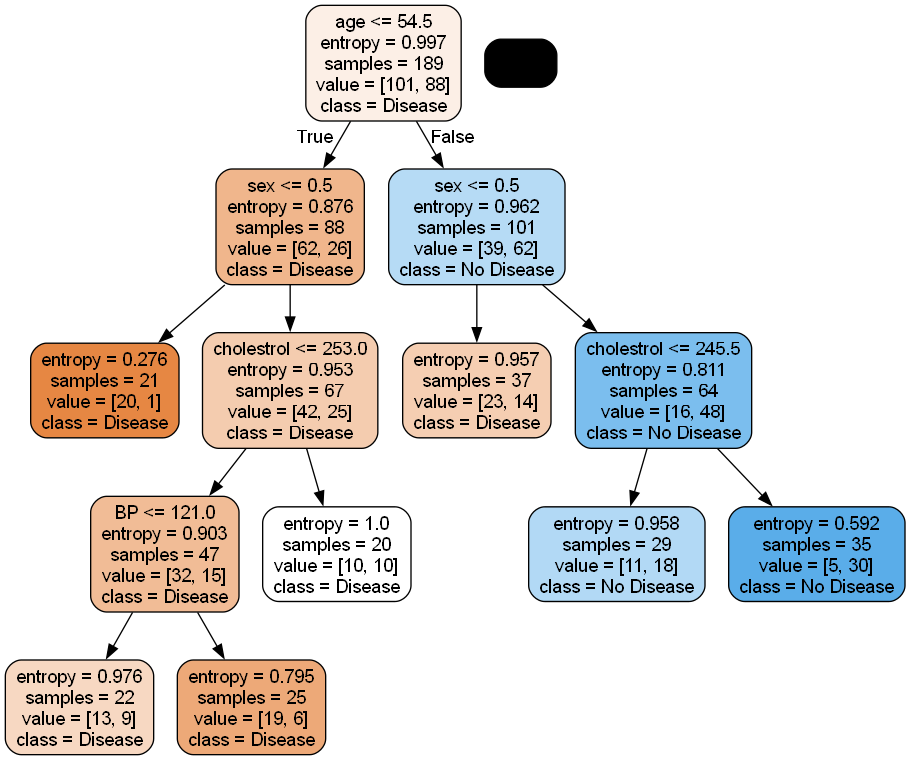

In [43]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [44]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Hyper-parameter tuning

In [46]:
dt = DecisionTreeClassifier(random_state=42)

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [49]:
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [50]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

cv is cross validation scheme 
if we say 5, then the train data is divided into 5 sets 
4/5th of the data is used for training, 1/5th of the data is used for validating


In [52]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: total: 297 ms
Wall time: 3.81 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [53]:
grid_search.cv_results_

{'mean_fit_time': array([0.00463834, 0.00361376, 0.00323334, 0.00312581, 0.00353155,
        0.00302114, 0.00353518, 0.00292506, 0.00312486, 0.00342755,
        0.00293059, 0.00261703, 0.00322399, 0.00322194, 0.00269551,
        0.00380182, 0.0030117 , 0.00294003, 0.00334849, 0.0030118 ,
        0.00328155, 0.00287762, 0.00362701, 0.00302806, 0.0033287 ,
        0.00312696, 0.00252237, 0.00362444, 0.00242281, 0.00352273,
        0.00342588, 0.0026247 , 0.00302219, 0.00372653, 0.00282025,
        0.00261359, 0.00271988, 0.00282669, 0.00281873, 0.00261683,
        0.00317335, 0.00317926, 0.00422821, 0.0032238 , 0.0027246 ,
        0.00398474, 0.00316744, 0.0032238 , 0.00252061, 0.00325603]),
 'std_fit_time': array([0.00080692, 0.00128218, 0.00082991, 0.0008595 , 0.00045437,
        0.00090719, 0.00044289, 0.00074347, 0.00090887, 0.0009782 ,
        0.00093547, 0.00059528, 0.0006826 , 0.00068039, 0.00059631,
        0.0014639 , 0.00032046, 0.00019143, 0.00042944, 0.00104418,
        0.000

In [54]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004638,0.000807,0.003629,0.000811,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,2
1,0.003614,0.001282,0.001774,0.001077,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,2
2,0.003233,0.000830,0.002517,0.000783,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,2
3,0.003126,0.000859,0.001767,0.000989,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.631579,0.684211,0.605263,0.631579,0.675676,0.645661,0.029717,21
4,0.003532,0.000454,0.002219,0.000408,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.552632,0.526316,0.526316,0.526316,0.540541,0.534424,0.010641,41


In [55]:
score_df.shape

(50, 16)

In [56]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
35,0.002614,0.000971,0.001109,0.000925,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.684211,0.763158,0.736842,0.657895,0.675676,0.703556,0.039741,1
0,0.004638,0.000807,0.003629,0.000811,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,2
1,0.003614,0.001282,0.001774,0.001077,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,2
2,0.003233,0.000830,0.002517,0.000783,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,2
7,0.002925,0.000743,0.001714,0.000400,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.657895,0.710526,0.684211,0.710526,0.702703,0.693172,0.020090,2


In [57]:
grid_search.best_score_

0.703556187766714

In [58]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [59]:
dt_best = grid_search.best_estimator_

In [60]:
evaluate_model(dt_best)

Train Accuracy : 0.7936507936507936
Train Confusion Matrix:
[[87 14]
 [25 63]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[35 14]
 [15 17]]


In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71        49
           1       0.55      0.53      0.54        32

    accuracy                           0.64        81
   macro avg       0.62      0.62      0.62        81
weighted avg       0.64      0.64      0.64        81



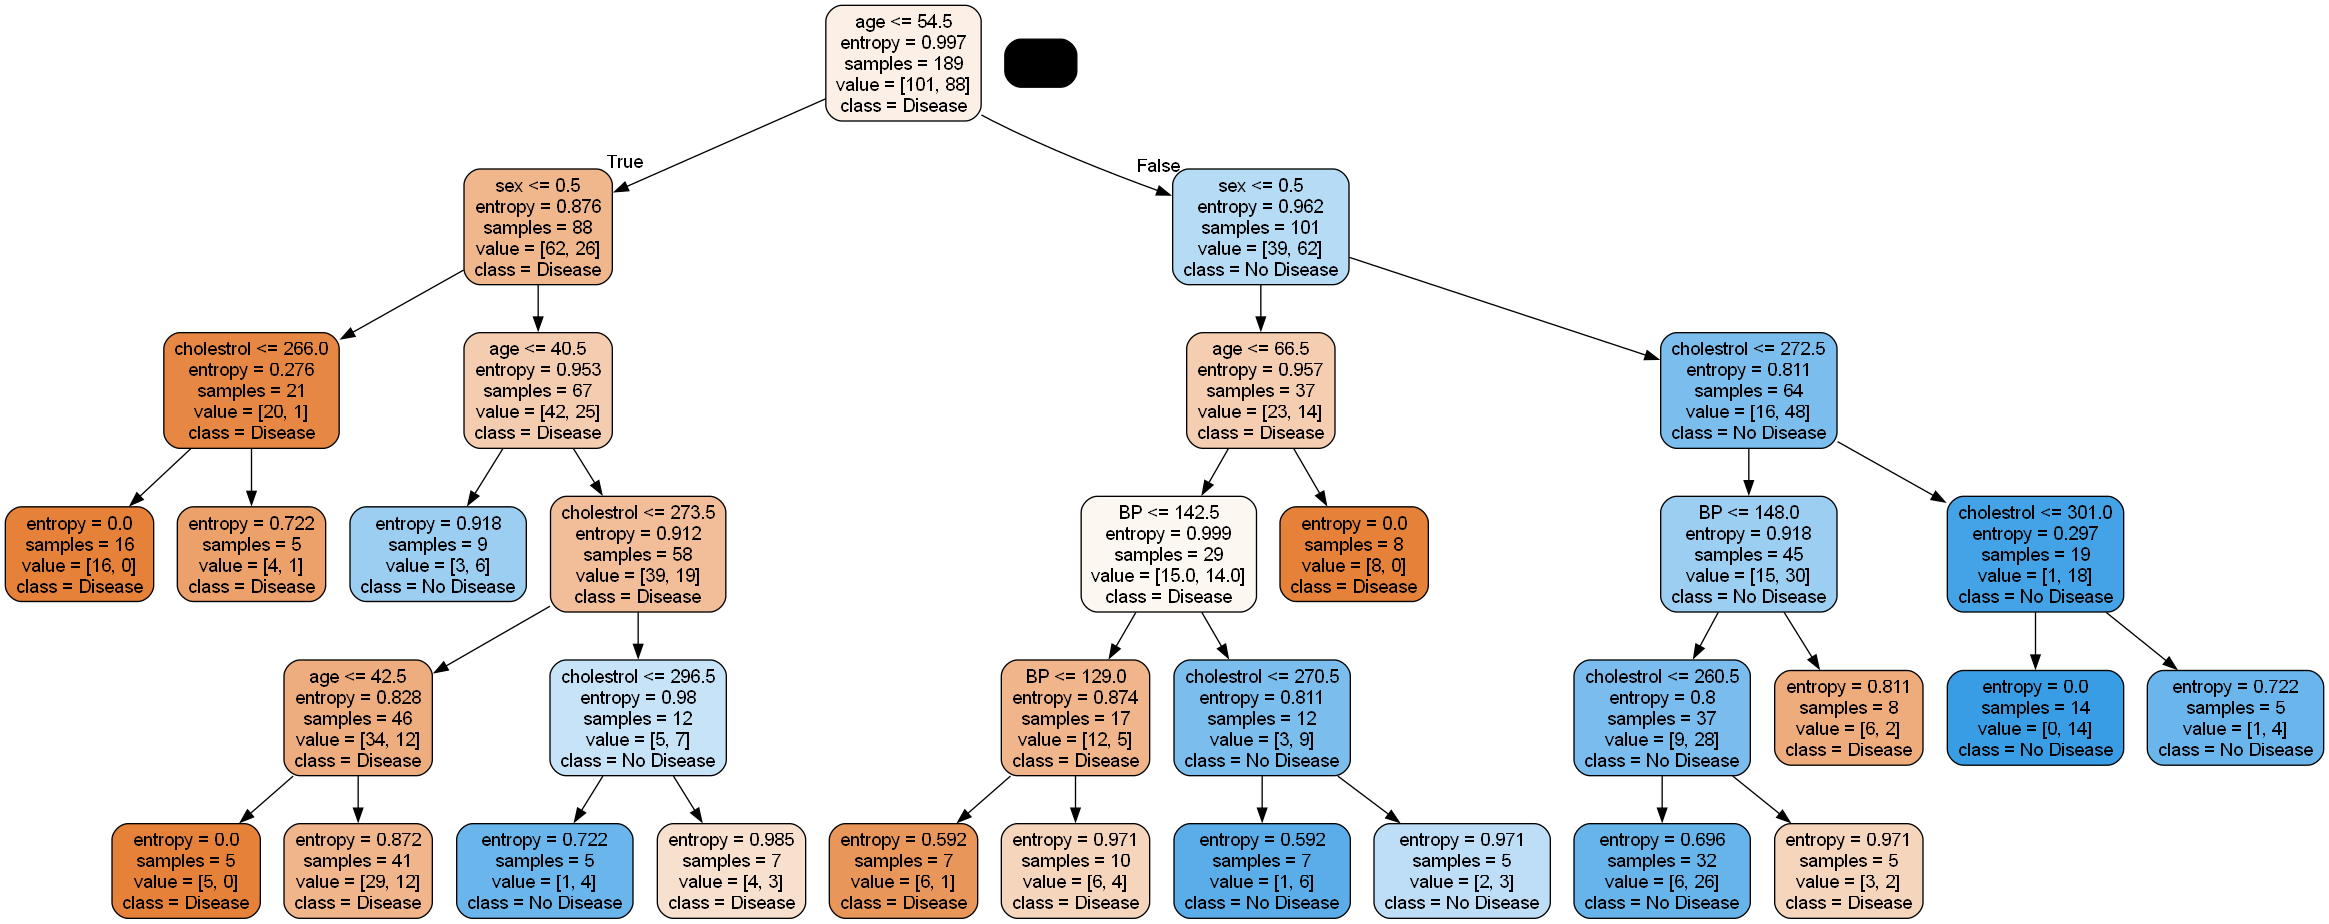

In [63]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())